## Import libraries

In [1]:
from recsys_data_preprocessing import *
from model import *
from prepare_data import *
from metrics import *
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Download the dataset

In [2]:
rec = RecSysData(("./data/interactions.csv"))

In [3]:
interactions_df = rec.get_interactions_and_users_data(['./data/user_age.csv', './data/user_region.csv'])

In [4]:
item_info_df = rec.get_items_data(['./data/item_asset.csv', './data/item_price.csv', './data/item_subclass.csv'])

In [5]:
interactions_df

,personId,contentId,result,one-hot feature number of the region,feature_of_the_region,age
0,0,3568,1.0,6.0,1.0,NaN
1,0,3568,1.0,0.0,1.0,NaN
2,0,3827,1.0,6.0,1.0,NaN
3,0,3827,1.0,0.0,1.0,NaN
4,0,4844,1.0,6.0,1.0,NaN
...,...,...,...,...,...,...
401452,30910,18176,1.0,0.0,1.0,NaN
401453,30910,18185,1.0,0.0,1.0,NaN
401454,30910,18248,1.0,0.0,1.0,NaN
401455,30910,18349,1.0,0.0,1.0,NaN


In [6]:
item_info_df

,contentId,characteristic value,price,category number,sign of relation to the category
0,0,0.009497,0.012911,679,1.0
1,1,0.004226,0.005211,1376,1.0
2,2,0.003371,0.004131,1495,1.0
3,3,0.002991,0.003521,502,1.0
4,4,0.002991,0.003521,502,1.0
...,...,...,...,...,...
18490,15387,NaN,0.002019,3,1.0
18491,15388,NaN,0.002113,3,1.0
18492,15389,NaN,0.002113,3,1.0
18493,15390,NaN,0.002113,3,1.0


## Reduce the amount of data 

In [7]:
interactions_full_df = collapse_all_actions_with_one_product_into_one_interaction(interactions_df, 50)

## Split data into training and testing 

In [8]:
interactions_train_df, interactions_test_df = train_test_split(interactions_full_df,
                                   stratify=interactions_full_df['personId'], 
                                   test_size=0.2,
                                   random_state=42)

## Prepare data for convenient measuring quality

In [9]:
interactions = prepare_data_for_convenient_measuring_quality(interactions_train_df, interactions_test_df)

In [10]:
scores = []

## Baseline (model by popularity)

In [11]:
baseline = Baseline(interactions)
baseline.fit(interactions_train_df)
baseline.predict()
scores.append(calc_metrics('prediction_popular', interactions))
print(calc_metrics('prediction_popular', interactions))

0.02953795379537966


## SVD model

In [12]:
svd_model = SVDModel(interactions)
svd_model.fit(interactions_train_df)
svd_model.predict()
scores.append(calc_metrics('prediction_svd', interactions))
print(calc_metrics('prediction_svd', interactions))

  0%|          | 0/1212 [00:00<?, ?it/s]

0.03638613861386162


## Collaborative Filtering mode

In [13]:
collaborative = CollaborativeFilteringModel(interactions)
collaborative.fit(interactions_train_df)
collaborative.predict()
scores.append(calc_metrics('prediction_user_based', interactions))
print(calc_metrics('prediction_user_based', interactions))

  0%|          | 0/1211 [00:00<?, ?it/s]

  0%|          | 0/1212 [00:00<?, ?it/s]

0.0016501650165016506


## Content-Based Filtering model

In [14]:
X_train, y_train, test = prepare_data_for_content_based_recommender(interactions, interactions_train_df, item_info_df)
contentrecsys = ContentBasedRecommender(interactions)
contentrecsys.fit(X_train, y_train)
contentrecsys.predict(test)
scores.append(calc_metrics('prediction_content', interactions))
print(calc_metrics('prediction_content', interactions))

Learning rate set to 0.106878
0:	learn: 0.9922539	total: 100ms	remaining: 1m 39s
1:	learn: 0.9111043	total: 131ms	remaining: 1m 5s
2:	learn: 0.8474012	total: 162ms	remaining: 53.8s
3:	learn: 0.7959197	total: 193ms	remaining: 48s
4:	learn: 0.7534031	total: 229ms	remaining: 45.5s
5:	learn: 0.7180138	total: 264ms	remaining: 43.7s
6:	learn: 0.6882044	total: 298ms	remaining: 42.2s
7:	learn: 0.6628544	total: 330ms	remaining: 40.9s
8:	learn: 0.6413775	total: 364ms	remaining: 40.1s
9:	learn: 0.6226258	total: 397ms	remaining: 39.3s
10:	learn: 0.6064815	total: 431ms	remaining: 38.7s
11:	learn: 0.5925139	total: 464ms	remaining: 38.2s
12:	learn: 0.5802981	total: 498ms	remaining: 37.8s
13:	learn: 0.5695778	total: 529ms	remaining: 37.3s
14:	learn: 0.5602099	total: 562ms	remaining: 36.9s
15:	learn: 0.5516363	total: 596ms	remaining: 36.7s
16:	learn: 0.5442830	total: 630ms	remaining: 36.4s
17:	learn: 0.5377045	total: 663ms	remaining: 36.2s
18:	learn: 0.5321427	total: 695ms	remaining: 35.9s
19:	learn: 0

166:	learn: 0.4599414	total: 5.66s	remaining: 28.2s
167:	learn: 0.4598654	total: 5.69s	remaining: 28.2s
168:	learn: 0.4597655	total: 5.73s	remaining: 28.2s
169:	learn: 0.4597100	total: 5.76s	remaining: 28.1s
170:	learn: 0.4596071	total: 5.79s	remaining: 28.1s
171:	learn: 0.4595279	total: 5.83s	remaining: 28.1s
172:	learn: 0.4594538	total: 5.86s	remaining: 28s
173:	learn: 0.4593411	total: 5.9s	remaining: 28s
174:	learn: 0.4592450	total: 5.93s	remaining: 28s
175:	learn: 0.4592000	total: 5.96s	remaining: 27.9s
176:	learn: 0.4591448	total: 5.99s	remaining: 27.9s
177:	learn: 0.4590909	total: 6.03s	remaining: 27.8s
178:	learn: 0.4590517	total: 6.06s	remaining: 27.8s
179:	learn: 0.4589975	total: 6.09s	remaining: 27.7s
180:	learn: 0.4589071	total: 6.12s	remaining: 27.7s
181:	learn: 0.4588342	total: 6.15s	remaining: 27.7s
182:	learn: 0.4587258	total: 6.18s	remaining: 27.6s
183:	learn: 0.4585704	total: 6.22s	remaining: 27.6s
184:	learn: 0.4584707	total: 6.25s	remaining: 27.6s
185:	learn: 0.45841

327:	learn: 0.4495212	total: 11.2s	remaining: 23s
328:	learn: 0.4494687	total: 11.3s	remaining: 23s
329:	learn: 0.4494338	total: 11.3s	remaining: 22.9s
330:	learn: 0.4493472	total: 11.3s	remaining: 22.9s
331:	learn: 0.4492944	total: 11.4s	remaining: 22.9s
332:	learn: 0.4492596	total: 11.4s	remaining: 22.8s
333:	learn: 0.4492018	total: 11.4s	remaining: 22.8s
334:	learn: 0.4491817	total: 11.5s	remaining: 22.7s
335:	learn: 0.4491391	total: 11.5s	remaining: 22.7s
336:	learn: 0.4490914	total: 11.5s	remaining: 22.7s
337:	learn: 0.4490347	total: 11.6s	remaining: 22.6s
338:	learn: 0.4489692	total: 11.6s	remaining: 22.6s
339:	learn: 0.4489206	total: 11.6s	remaining: 22.6s
340:	learn: 0.4488774	total: 11.7s	remaining: 22.5s
341:	learn: 0.4488261	total: 11.7s	remaining: 22.5s
342:	learn: 0.4487608	total: 11.7s	remaining: 22.5s
343:	learn: 0.4487037	total: 11.8s	remaining: 22.4s
344:	learn: 0.4486299	total: 11.8s	remaining: 22.4s
345:	learn: 0.4485963	total: 11.8s	remaining: 22.4s
346:	learn: 0.44

488:	learn: 0.4429837	total: 17s	remaining: 17.8s
489:	learn: 0.4429534	total: 17.1s	remaining: 17.8s
490:	learn: 0.4429321	total: 17.1s	remaining: 17.7s
491:	learn: 0.4429078	total: 17.1s	remaining: 17.7s
492:	learn: 0.4428830	total: 17.2s	remaining: 17.6s
493:	learn: 0.4428601	total: 17.2s	remaining: 17.6s
494:	learn: 0.4428184	total: 17.2s	remaining: 17.6s
495:	learn: 0.4427917	total: 17.3s	remaining: 17.5s
496:	learn: 0.4427780	total: 17.3s	remaining: 17.5s
497:	learn: 0.4427425	total: 17.3s	remaining: 17.5s
498:	learn: 0.4426993	total: 17.4s	remaining: 17.4s
499:	learn: 0.4426746	total: 17.4s	remaining: 17.4s
500:	learn: 0.4426436	total: 17.4s	remaining: 17.4s
501:	learn: 0.4425981	total: 17.5s	remaining: 17.3s
502:	learn: 0.4425898	total: 17.5s	remaining: 17.3s
503:	learn: 0.4425663	total: 17.5s	remaining: 17.3s
504:	learn: 0.4425249	total: 17.6s	remaining: 17.2s
505:	learn: 0.4425053	total: 17.6s	remaining: 17.2s
506:	learn: 0.4424847	total: 17.6s	remaining: 17.2s
507:	learn: 0.

648:	learn: 0.4385663	total: 23s	remaining: 12.4s
649:	learn: 0.4385495	total: 23s	remaining: 12.4s
650:	learn: 0.4385266	total: 23s	remaining: 12.4s
651:	learn: 0.4385084	total: 23.1s	remaining: 12.3s
652:	learn: 0.4384813	total: 23.1s	remaining: 12.3s
653:	learn: 0.4384711	total: 23.2s	remaining: 12.3s
654:	learn: 0.4384573	total: 23.2s	remaining: 12.2s
655:	learn: 0.4384412	total: 23.3s	remaining: 12.2s
656:	learn: 0.4384050	total: 23.3s	remaining: 12.2s
657:	learn: 0.4383625	total: 23.4s	remaining: 12.1s
658:	learn: 0.4383378	total: 23.4s	remaining: 12.1s
659:	learn: 0.4383285	total: 23.4s	remaining: 12.1s
660:	learn: 0.4382825	total: 23.5s	remaining: 12s
661:	learn: 0.4382449	total: 23.5s	remaining: 12s
662:	learn: 0.4382302	total: 23.6s	remaining: 12s
663:	learn: 0.4382121	total: 23.6s	remaining: 11.9s
664:	learn: 0.4381581	total: 23.6s	remaining: 11.9s
665:	learn: 0.4381449	total: 23.7s	remaining: 11.9s
666:	learn: 0.4381157	total: 23.7s	remaining: 11.8s
667:	learn: 0.4380946	to

808:	learn: 0.4350236	total: 28.7s	remaining: 6.78s
809:	learn: 0.4350145	total: 28.7s	remaining: 6.74s
810:	learn: 0.4350018	total: 28.8s	remaining: 6.7s
811:	learn: 0.4349947	total: 28.8s	remaining: 6.67s
812:	learn: 0.4349743	total: 28.8s	remaining: 6.63s
813:	learn: 0.4349591	total: 28.9s	remaining: 6.6s
814:	learn: 0.4349359	total: 28.9s	remaining: 6.56s
815:	learn: 0.4349219	total: 28.9s	remaining: 6.53s
816:	learn: 0.4348937	total: 29s	remaining: 6.49s
817:	learn: 0.4348683	total: 29s	remaining: 6.46s
818:	learn: 0.4348422	total: 29.1s	remaining: 6.42s
819:	learn: 0.4348306	total: 29.1s	remaining: 6.38s
820:	learn: 0.4348232	total: 29.1s	remaining: 6.35s
821:	learn: 0.4348073	total: 29.2s	remaining: 6.32s
822:	learn: 0.4347895	total: 29.2s	remaining: 6.28s
823:	learn: 0.4347860	total: 29.2s	remaining: 6.24s
824:	learn: 0.4347602	total: 29.3s	remaining: 6.21s
825:	learn: 0.4347372	total: 29.3s	remaining: 6.17s
826:	learn: 0.4347107	total: 29.3s	remaining: 6.14s
827:	learn: 0.4346

972:	learn: 0.4319821	total: 35s	remaining: 970ms
973:	learn: 0.4319718	total: 35s	remaining: 934ms
974:	learn: 0.4319564	total: 35s	remaining: 898ms
975:	learn: 0.4319484	total: 35.1s	remaining: 862ms
976:	learn: 0.4319318	total: 35.1s	remaining: 827ms
977:	learn: 0.4319244	total: 35.1s	remaining: 791ms
978:	learn: 0.4318969	total: 35.2s	remaining: 755ms
979:	learn: 0.4318875	total: 35.2s	remaining: 719ms
980:	learn: 0.4318838	total: 35.3s	remaining: 683ms
981:	learn: 0.4318537	total: 35.3s	remaining: 647ms
982:	learn: 0.4318358	total: 35.3s	remaining: 611ms
983:	learn: 0.4318051	total: 35.4s	remaining: 575ms
984:	learn: 0.4317914	total: 35.4s	remaining: 539ms
985:	learn: 0.4317634	total: 35.4s	remaining: 503ms
986:	learn: 0.4317517	total: 35.5s	remaining: 467ms
987:	learn: 0.4317433	total: 35.5s	remaining: 431ms
988:	learn: 0.4317356	total: 35.5s	remaining: 395ms
989:	learn: 0.4317249	total: 35.6s	remaining: 359ms
990:	learn: 0.4317082	total: 35.6s	remaining: 323ms
991:	learn: 0.4317

  0%|          | 0/1212 [00:00<?, ?it/s]

0.01815181518151817


## Factorization Machine

In [15]:
train_features, test_features, y_train = prepare_data_for_factorization_machines(interactions_train_df, 
                                                                                 interactions)
factorization = FactorizationMachines(interactions)
factorization.fit(train_features, y_train,interactions_train_df)
factorization.predict(test_features)
scores.append(calc_metrics('fm_prediction', interactions))
print(calc_metrics('fm_prediction', interactions))

  0%|          | 0/72634 [00:00<?, ?it/s]

  0%|          | 0/1212 [00:00<?, ?it/s]

Creating validation dataset of 0.01 of training for adaptive regularization
-- Epoch 1
Training MSE: 0.10872
-- Epoch 2
Training MSE: 0.09398
-- Epoch 3
Training MSE: 0.08902
-- Epoch 4
Training MSE: 0.08664
-- Epoch 5
Training MSE: 0.08532
-- Epoch 6
Training MSE: 0.08441
-- Epoch 7
Training MSE: 0.08404
-- Epoch 8
Training MSE: 0.08371
-- Epoch 9
Training MSE: 0.08337
-- Epoch 10
Training MSE: 0.08306
-- Epoch 11
Training MSE: 0.08275
-- Epoch 12
Training MSE: 0.08256
-- Epoch 13
Training MSE: 0.08231
-- Epoch 14
Training MSE: 0.08205
-- Epoch 15
Training MSE: 0.08190
-- Epoch 16
Training MSE: 0.08175
-- Epoch 17
Training MSE: 0.08167
-- Epoch 18
Training MSE: 0.08159
-- Epoch 19
Training MSE: 0.08156
-- Epoch 20
Training MSE: 0.08148
-- Epoch 21
Training MSE: 0.08135
-- Epoch 22
Training MSE: 0.08129
-- Epoch 23
Training MSE: 0.08114
-- Epoch 24
Training MSE: 0.08109
-- Epoch 25
Training MSE: 0.08102
-- Epoch 26
Training MSE: 0.08088
-- Epoch 27
Training MSE: 0.08081
-- Epoch 28
Tra

## Comparing the methods

In [16]:
scores = ["%.3f" % x for x in scores]
global_metrics_df = pd.DataFrame({'ModelName': ['Baseline', "SVDModel",  "CollaborativeFilteringModel", 
                                                  "ContentBasedRecommender", "FactorizationMachines"],
                     'Score': scores
                    }).set_index("ModelName")
global_metrics_df["Score"] = global_metrics_df["Score"].astype(float)

In [17]:
global_metrics_df

,Score
ModelName,
Baseline,0.030
SVDModel,0.036
CollaborativeFilteringModel,0.002
ContentBasedRecommender,0.018
FactorizationMachines,0.019


## Plot Comparison

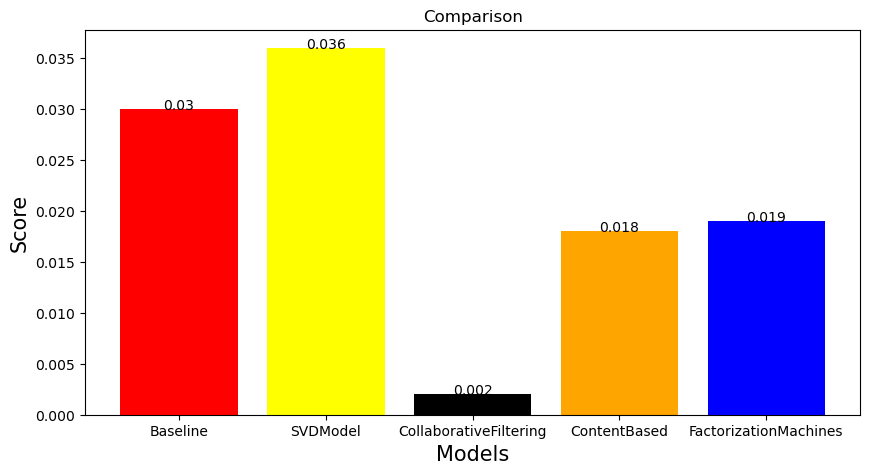

In [18]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
 
# creating data on which bar chart will be plot
x = ['Baseline', "SVDModel",  "CollaborativeFiltering", 
     "ContentBased", "FactorizationMachines"]

y = list(global_metrics_df["Score"])
     
# setting figure size by using figure() function
plt.figure(figsize = (10, 5))

c = ['red', 'yellow', 'black', 'orange', "blue"]
# making the bar chart on the data
plt.bar(x, y, color =c)
     
# calling the function to add value labels
addlabels(x, y)
     
# giving title to the plot
plt.title("Comparison")
     
# giving X and Y labels
plt.xlabel("Models", fontsize=15)
plt.ylabel("Score", fontsize=15)

plt.savefig('comparison_models_plot.png')
plt.show()